In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [33]:
dataset = pd.read_csv('Position_Salaries.csv')

In [34]:
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [35]:
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [36]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [37]:
y = y.reshape(len(y), 1)

In [38]:
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


In [39]:
# feature scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()

X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)



In [40]:
print(X)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [41]:
print(y)


[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


In [42]:
# training the SVR model on the whole dataset
from sklearn.svm import SVR

regressor = SVR(kernel='rbf')
regressor.fit(X, y)

/home/mrsam/Dev/ML/env/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [43]:
# predicting a new result

y_pred = sc_y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])).reshape(-1,1))


In [44]:
print(y_pred)

[[170370.0204065]]


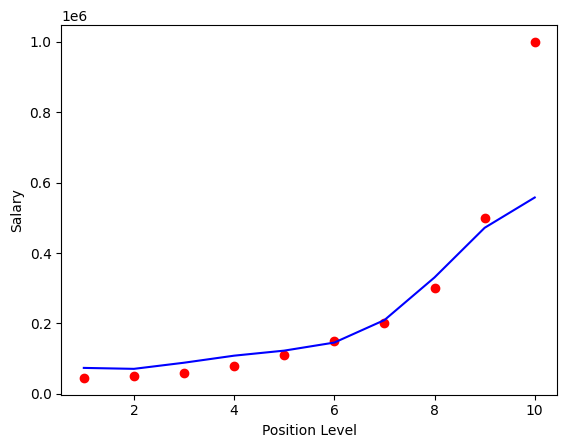

In [46]:
# visualizing the SVR model 
# on the whole dataset

plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'red')
plt.plot(sc_X.inverse_transform(X), sc_y.inverse_transform(regressor.predict(X).reshape(-1,1)), color = 'blue')
plt.title('')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

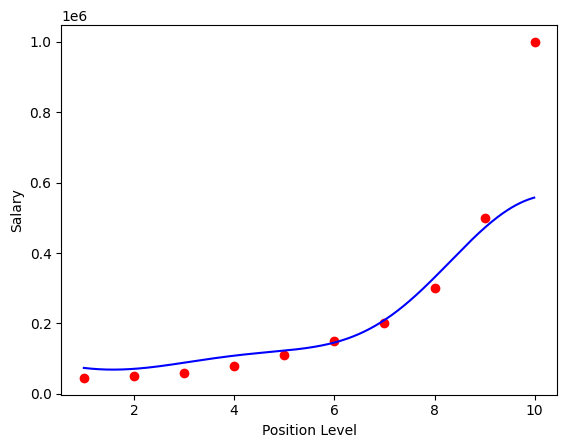

In [56]:
# visualizing the SVR results (higher resolution and smoother curve) 
X_grid = np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)), 0.01 )
X_grid = X_grid.reshape(len(X_grid), 1)

plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'red')
plt.plot(X_grid, sc_y.inverse_transform(regressor.predict(sc_X.transform(X_grid)).reshape(-1,1)), color = 'blue')
plt.title('')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()